In [148]:
import graphinf, midynet, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, tqdm.notebook as tqdm, os
import graph_tool.all as gt

from midynet.utility import display
from functools import partial
from collections import defaultdict
from itertools import product
from scipy.stats import ttest_ind

In [149]:
path_to_data = "../../data/recon/graph-efficiency/"

In [150]:
models = [
    "erdosrenyi",
    "configuration",
    "stochastic_block_model",
    "degree_corrected_stochastic_block_model",
]

targets = [
    "erdosrenyi",
    "planted_partition",
    "karate",
    "littlerock",
]

model_tags = {
    "erdosrenyi": "ER",
    "configuration" :"CM",
    "stochastic_block_model": "SBM",
    "degree_corrected_stochastic_block_model": "DCSBM",
}

df = {
    k: pd.read_pickle(os.path.join(path_to_data, f"recon-{k}/recon_efficiency.pkl"))
    for k in targets
}

In [151]:
ttest_ind?


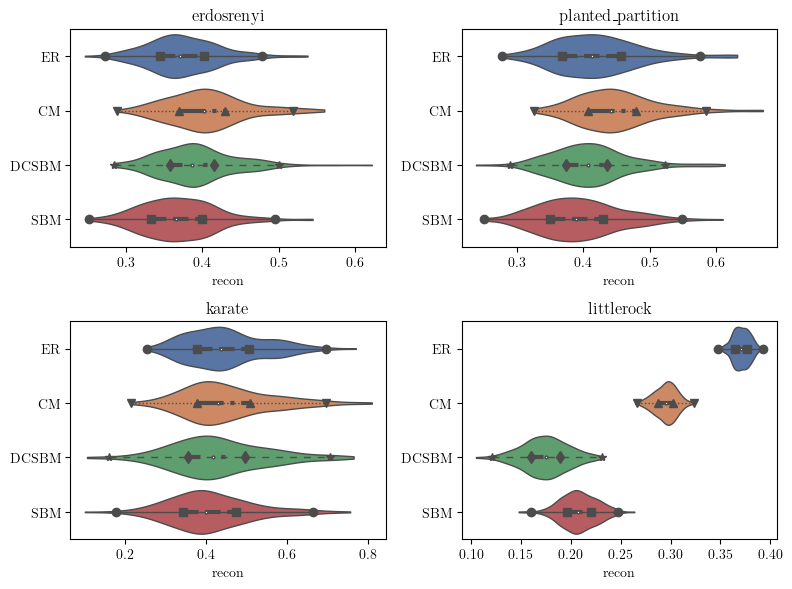

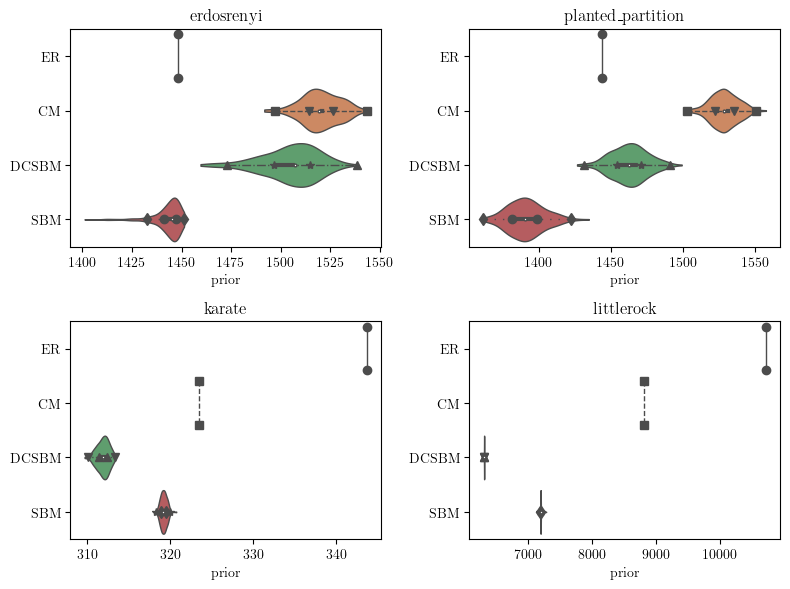

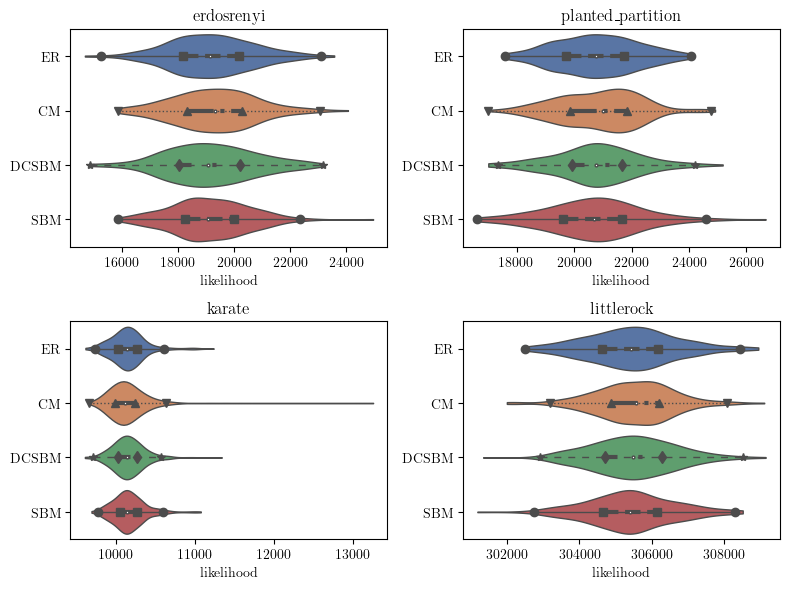

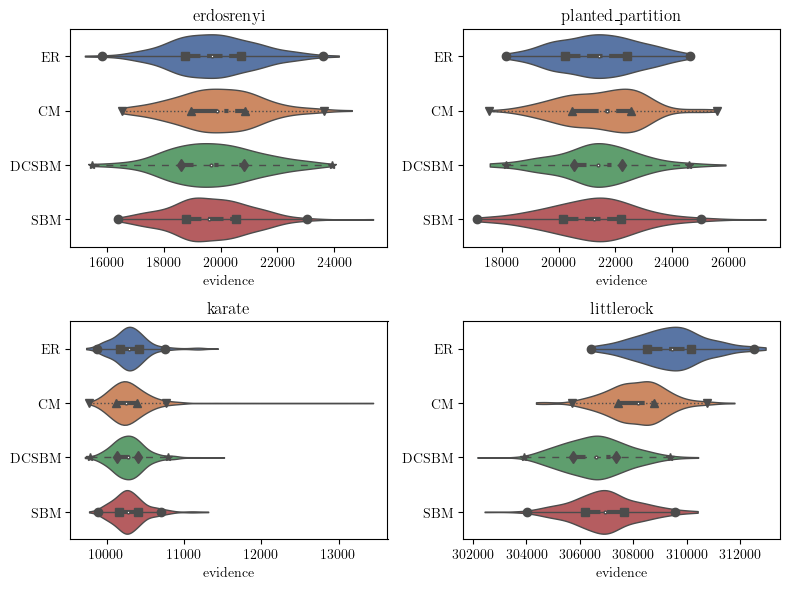

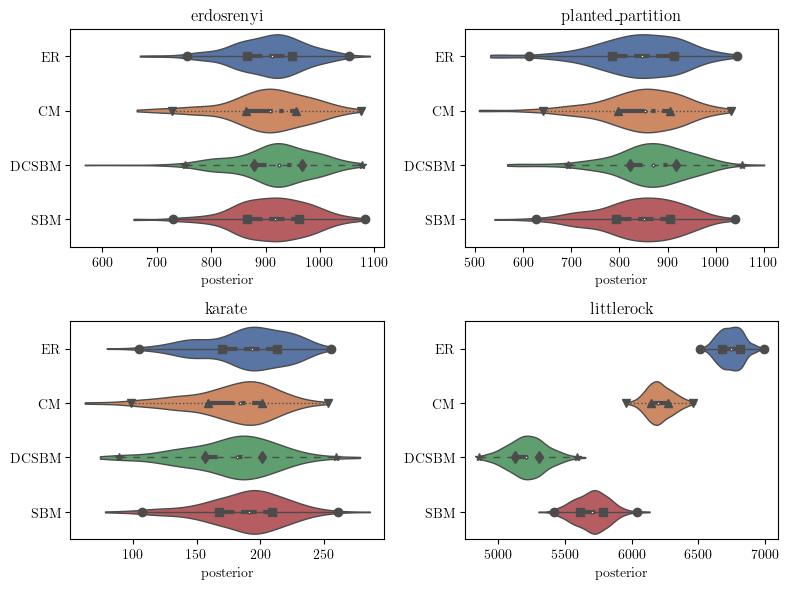

In [86]:
target = ["erdosrenyi", "planted_partition", "karate", "littlerock"]
metrics = ["recon", "prior", "likelihood", "evidence", "posterior"]
nmap = {
    "erdosrenyi": "ER",
    "configuration": "CM",
    "stochastic_block_model": "SBM",
    "degree_corrected_stochastic_block_model": "DCSBM",
}

for m in metrics:
    fig, ax = plt.subplots(2, 2, figsize=(4*2, 3*2))
    ax= ax.flatten()

    for i, t in enumerate(target):
        x = pd.DataFrame({nmap[k.split(".")[-1]]: v.get(m).values for k, v in df[t].items()})
        sns.violinplot(x, orient="h", palette="deep", ax=ax[i], cut=0, scale="width")
#         for j, (k, v) in enumerate(df[t].items()):
#             ax[i].axvline(v.mutualinfo.mean() / v.prior.mean(), color=sns.color_palette("deep", n_colors=4)[j])
        ax[i].set_xlabel(m)
#         ax[i].set_xlim([0, 1])
        ax[i].set_title(t)
    fig.tight_layout()
#     fig.savefig("recon.png")
# plt.legend()

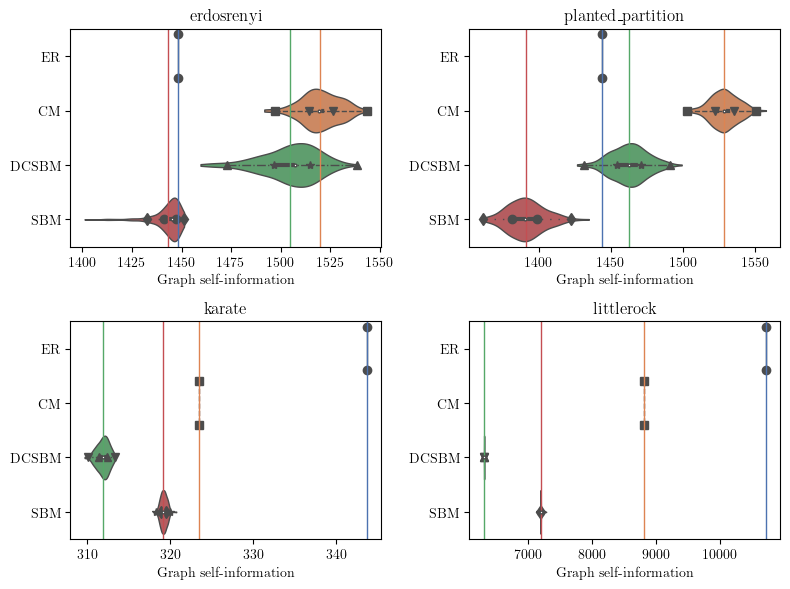

In [37]:
target = ["erdosrenyi", "planted_partition", "karate", "littlerock"]
nmap = {
    "erdosrenyi": "ER",
    "configuration": "CM",
    "stochastic_block_model": "SBM",
    "degree_corrected_stochastic_block_model": "DCSBM",
}
fig, ax = plt.subplots(2, 2, figsize=(4*2, 3*2))
ax= ax.flatten()

for i, t in enumerate(target):
    recon = pd.DataFrame({
        nmap[k.split(".")[-1]]: 
        -v.graph_evidence.values if "graph_evidence" in v else v.prior.values
        for k, v in df[t].items()
    })
# sns.displot(recon, kde=True)
# plt.hist(recon, color=sns.color_palette("deep", n_colors=len(recon)))

# for i, k in enumerate(df[target].keys()):
#     name = k.split(".")[-1]
#     recon = df[target][k].recon.values
#     sns.histplot(
#         recon, 
#         bins=np.linspace(0, 1, 50), 
#         color=sns.color_palette("deep", n_colors=10)[i], 
# #         kde_kws=dict(marker="None", linewidth=2),
# #         hist_kws=dict(multiple="dodge"),
#         multiple="dodge",
#         label=name
#     )
# sns.histplot(recon, multiple="dodge", alpha=0.2, stat="density")

    sns.violinplot(recon, orient="h", palette="deep", ax=ax[i], cut=0, scale="width")
    
    for j, (k, v) in enumerate(df[t].items()):
        ax[i].axvline(v.prior.mean(), color=sns.color_palette("deep", n_colors=4)[j])
    ax[i].set_xlabel("Graph self-information")
    ax[i].set_title(t)
#     ax[i].set_xlim([0,1])

fig.tight_layout()
fig.savefig("self-info.png")
# plt.legend()

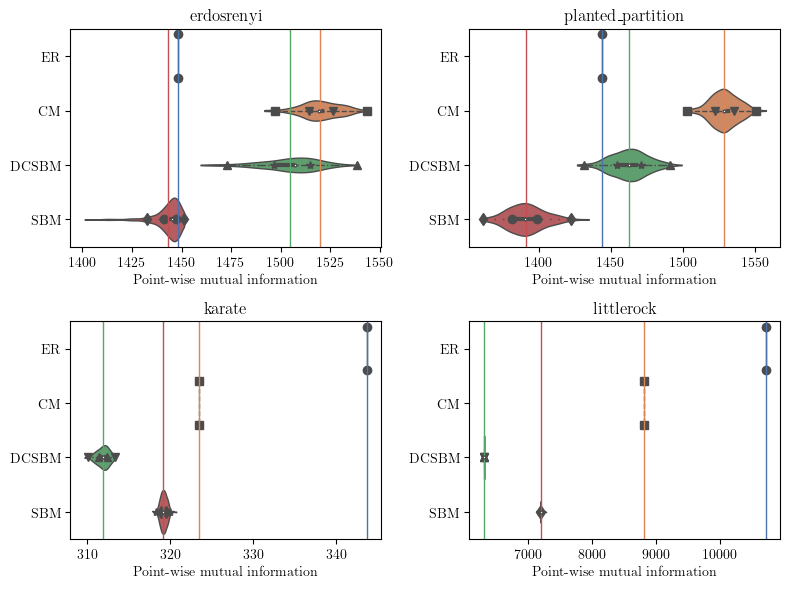

In [50]:
target = ["erdosrenyi", "planted_partition", "karate", "littlerock"]
nmap = {
    "erdosrenyi": "ER",
    "configuration": "CM",
    "stochastic_block_model": "SBM",
    "degree_corrected_stochastic_block_model": "DCSBM",
}
fig, ax = plt.subplots(2, 2, figsize=(4*2, 3*2))
ax= ax.flatten()

for i, t in enumerate(target):
    recon = pd.DataFrame({
        nmap[k.split(".")[-1]]: 
        v.prior.values
        for k, v in df[t].items()
    })
    
    sns.violinplot(recon, orient="h", palette="deep", ax=ax[i], cut=0, scale="area")
    for j, (k, v) in enumerate(df[t].items()):
        ax[i].axvline(v.prior.mean(), color=sns.color_palette("deep", n_colors=4)[j])
    ax[i].set_xlabel("Point-wise mutual information")
    ax[i].set_title(t)
#     ax[i].set_xlim([0,1])

fig.tight_layout()
# fig.savefig("mutualinfo.png")
# plt.legend()

In [52]:
from scipy.stats import ttest_ind

In [53]:
ttest_ind?

In [13]:
g0 = midynet.config.GraphConfig.karate()
g0 = midynet.config.GraphFactory.build(g0)
G = graphinf.graph.StochasticBlockModelFamily(
    g0.get_size(), g0.get_total_edge_number()
)
G.set_state(g0)

In [14]:
G.log_joint(), G.log_likelihood(), G.log_prior(), G.get_label_log_joint()

(-259.37317239065226,
 -141.5351070565439,
 -117.83806533410838,
 -67.46750227384177)

In [15]:
G.log_evidence(method="partition_meanfield", n_sweeps=1000, n_steps_per_vertex=10)

-171.185536280984

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


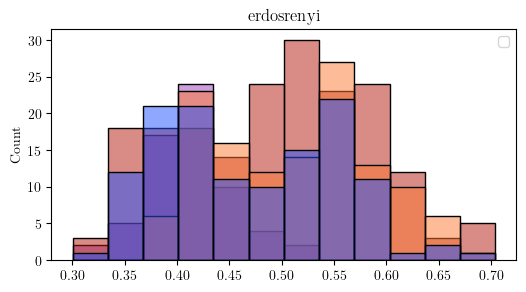

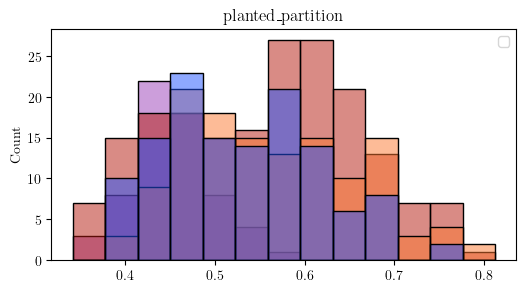

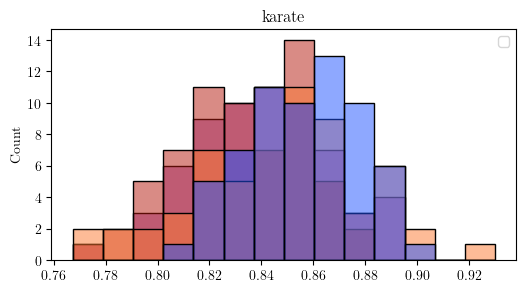

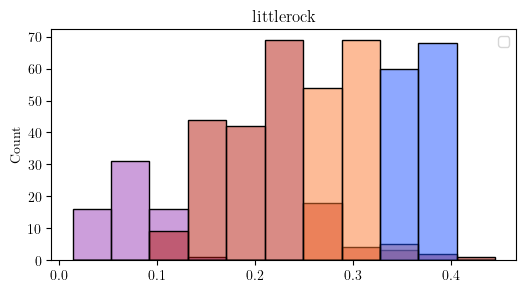

In [29]:
for target in targets:
    fig, ax = plt.subplots(figsize=(6, 3))

#     target = "erdosrenyi"
    d = pd.DataFrame({m: df[target][f"{target}-glauber.{m}"].recon for m in models})
    sns.histplot(d, ax=ax)
#     for m in models:
#         key = f"{target}-glauber.{m}"
#         d = df[target][key]
        
#         sns.histplot(d, x="recon", ax=ax, label=model_tags[m], bins=)
#         print(key, d.recon.mean())
    ax.legend()
    ax.set_title(target)

In [30]:
d

,erdosrenyi,configuration,stochastic_block_model,degree_corrected_stochastic_block_model
0,0.366585,0.309809,0.211907,0.083898
1,0.366092,0.300810,0.276443,0.084554
2,0.373691,0.311464,0.169996,0.017036
3,0.369604,0.321424,0.209228,0.071190
4,0.401165,0.313111,0.212408,0.062189
...,...,...,...,...
187,NaN,NaN,0.182709,NaN
188,NaN,NaN,0.127515,NaN
189,NaN,NaN,0.131041,NaN
190,NaN,NaN,0.116438,NaN


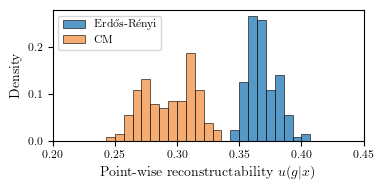

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))

ax.set_xlabel(r"Point-wise reconstructability $u(g|x)$", fontsize=display.fontsizes["label"])
ax.set_ylabel(r"Density", fontsize=display.fontsizes["label"])
ax.tick_params(axis="both", which="both", labelsize=display.fontsizes["tick"])

sns.histplot(
    df["littlerock"]["littlerock-glauber.erdosrenyi"],
    x="recon", 
    stat="probability", 
    color=display.med_colors["blue"],
    label=r"Erd\H{o}s-R\'enyi",
    bins=np.linspace(0.1, 0.45, 50),
    
)
# ax.axvline(
#     df["littlerock"]["littlerock-glauber.erdosrenyi"].recon.mean(), 
#     color=display.dark_colors["blue"], linestyle="-",
#     linewidth=2,
# )

sns.histplot(
    df["littlerock"]["littlerock-glauber.configuration"], 
    x="recon", 
    stat="probability", 
    color=display.med_colors["orange"],
    label="CM",
    bins=np.linspace(0.1, 0.45, 50),
)
# ax.axvline(
#     df["littlerock"]["littlerock-glauber.configuration"].recon.mean(), 
#     color=display.dark_colors["orange"], linestyle="-",
#     linewidth=2
# )

# sns.histplot(
#     df["littlerock"]["littlerock-glauber.stochastic_block_model"], 
#     x="recon", 
#     stat="probability", 
#     color=display.med_colors["green"],
#     label="SBM",
#     bins=np.linspace(0.1, 0.45, 50),
# )
# ax.axvline(
#     df["littlerock"]["littlerock-glauber.stochastic_block_model"].recon.mean(), 
#     color=display.dark_colors["green"], linestyle="-",
#     linewidth=2
# )
ax.legend(loc="upper left", fontsize=display.fontsizes["legend"])
ax.set_xlim([0.2, 0.45])

fig.tight_layout()
fig.savefig("./efficiency-littlerock-without_sbm.pdf")


In [2]:
g0 = midynet.config.GraphConfig.karate()
g0 = midynet.config.GraphFactory.build(g0)



In [3]:
G1 = graphinf.graph.StochasticBlockModelFamily(
    g0.get_size(), g0.get_total_edge_number(), block_prior_type="hyper", sample_label_count_prob=0.2
)
X1 = graphinf.data.dynamics.GlauberDynamics(G1, coupling=0.3, length=100)
X1.set_graph(g0)

G2 = graphinf.graph.ErdosRenyiModel(g0.get_size(), g0.get_total_edge_number())
X2 = graphinf.data.dynamics.GlauberDynamics(G2, coupling=0.3, length=100)
X2.set_graph(g0)


G3 = graphinf.graph.ConfigurationModelFamily(g0.get_size(), g0.get_total_edge_number())
X3 = graphinf.data.dynamics.GlauberDynamics(G3, coupling=0.3, length=100)
X3.set_graph(g0)

X1.freeze_param()
X1.unfreeze_graph_prior(1)
X1.unfreeze_graph(1)

X2.freeze_param()
X2.unfreeze_graph_prior(1)
X2.unfreeze_graph(1)

X3.freeze_param()
X3.unfreeze_graph_prior(1)
X3.unfreeze_graph(1)


In [6]:
data = defaultdict(list)

for _ in tqdm.tqdm(range(50)):
    X1.sample_state()
    X2.sample_state()
    X3.sample_state()
    
    
    data["x-prior"].append(G1.log_evidence())
    data["y-prior"].append(G2.log_evidence())
    data["z-prior"].append(G3.log_evidence(
        method="partition_meanfield", 
        n_sweeps=1000, 
        sample_with_gt=True,
    ))
    
#     data["x-posterior"].append(X1.log_posterior(method="meanfield", n_sweeps=200))
#     data["y-posterior"].append(X2.log_posterior(method="meanfield", n_sweeps=200))
#     data["z-posterior"].append(X3.log_posterior(method="meanfield", n_sweeps=200))
    
# data = {k: np.array(v) for k, v in data.items()}

  0%|          | 0/50 [00:00<?, ?it/s]

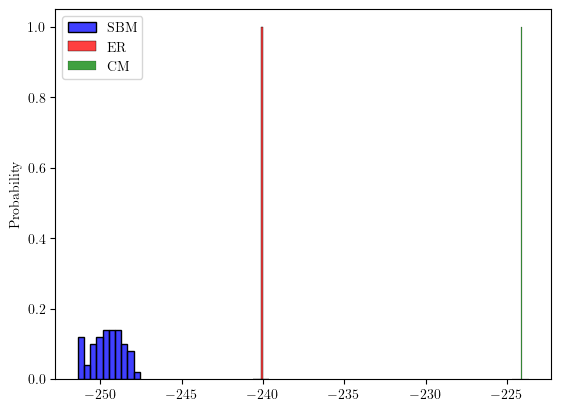

In [7]:
arrays = {k: np.array(v) for k, v in data.items()}

sns.histplot(arrays["x-prior"], stat="probability", label="SBM", color="blue", bins=10)

sns.histplot(arrays["y-prior"], stat="probability", label="ER", color="red", bins=10)

sns.histplot(arrays["z-prior"], stat="probability", label="CM", color="green", bins=10)
plt.legend()

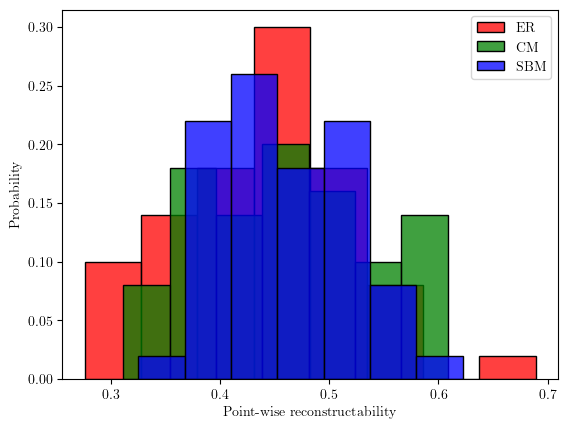

In [85]:
arrays = {k: np.array(v) for k, v in data.items()}


sns.histplot(1 - arrays["y-posterior"] / arrays["y-prior"], stat="probability", label="ER", color="red")

sns.histplot(1 - arrays["z-posterior"] / arrays["z-prior"], stat="probability", label="CM", color="green")

sns.histplot(1 - arrays["x-posterior"] / arrays["x-prior"], stat="probability", label="SBM", color="blue")

plt.xlabel("Point-wise reconstructability")
plt.legend()

In [80]:
p = []
pbar = tqdm.tqdm(total=1000)
for _ in range(1000):
    if np.random.rand() < 0.01:
        G1.sample_only_labels()
    G1.metropolis_sweep(5000)
    p.append(G1.get_labels())
    pbar.update()
    pbar.set_description(f"B={len(np.unique(p[-1]))}")

  0%|          | 0/1000 [00:00<?, ?it/s]

In [86]:
gt0 = graphinf.utility.convert_basegraph_to_graphtool(g0)

In [93]:
entropy_args = dict(
    adjacency=True,
    dl=True,
    partition_dl=True,
    degree_dl=True,
    edges_dl=True,
    dense=False,
    multigraph=True,
    recs=False,
    recs_dl=False,
    beta_dl=1,
    exact=True
)

In [66]:
import midynet, graphinf, graph_tool.all as gt, numpy as np
g0 = midynet.config.GraphConfig.karate()
g0 = midynet.config.GraphFactory.build(g0)
gt0 = graphinf.utility.convert_basegraph_to_graphtool(g0)
bs = gt.NestedBlockState(gt0)

entropy_args = dict(
    adjacency=True,
    dl=True,
    partition_dl=True,
    degree_dl=True,
    edges_dl=True,
    dense=False,
    multigraph=True,
    recs=False,
    recs_dl=False,
    beta_dl=1,
    exact=True
)
p = []
for _ in range(10):
    bs.multiflip_mcmc_sweep(entropy_args=entropy_args)


In [83]:
def reduce_partition(partition):
    reduced = []
    mapping = []
    if not isinstance(partition[0], list):
        partition = [partition]
    for i, bb in enumerate(partition):
        reduced.append([])
        mapping.append(dict())

        inverse = None if i == 0 else {v:k for k, v in mapping[i - 1].items()}
        idx = 0
        for j, _bb in enumerate(bb):
            if inverse is not None and j not in inverse:
                continue
            if _bb not in mapping[i]:
                mapping[i][_bb] = idx
                idx += 1
            if inverse is None:
                reduced[i].append(mapping[i][_bb])
            else:
                reduced[i].append(mapping[i][_bb])
        if len(reduced[i]) == 1:
            break
    return reduced

            
            

In [85]:
for i, (x, y) in enumerate(zip(reduce_partition(list(b[0])), b)):
    print(f"Reduced {i}:", np.array(x))
    print(f"Original {i}:", y)
    

Reduced 0: [0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0]
Original 0: [5 5 5 5 5 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 0 5 5 5]


In [69]:
mapping

[{5: 0, 0: 1}, {0: 0}, {0: 0}]

In [35]:

from graph_tool.inference import minimize_blockmodel_dl
import graph_tool.all as gt



In [28]:
g0 = midynet.config.GraphConfig.karate()
g0 = midynet.config.GraphFactory.build(g0)

def get_partition_guess(g0):
    gt_g0 = graphinf.utility.convert_basegraph_to_graphtool(g0)
    bs = minimize_blockmodel_dl(gt_g0)
    b0 = []
    mapping = defaultdict(int)
    for b in bs.get_blocks().a:
        if b not in mapping:
            mapping[b] = 0 if len(mapping) == 0 else max(mapping.values()) + 1
        b0.append(mapping[b])
    return b0

In [29]:
G = graphinf.graph.StochasticBlockModelFamily(
    g0.get_size(), 
    g0.get_total_edge_number(), 
    sample_label_count_prob=0.5, 
    block_prior_type="hyper"
)
G.set_labels(np.zeros(g0.get_size()).astype("int").tolist())
G.set_state(g0)

In [33]:
samples = []
pbar = tqdm.tqdm(total=1000)
for _ in range(1000):
    if np.random.rand() < 0.02:
        G.sample_only_labels()
    G.metropolis_sweep(g0.get_size() * 50)
    G.reduce_labels()
    samples.append(G.get_labels())
    pbar.update()
    pbar.set_description(f"B = {len(np.unique(G.get_labels()))}")
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [34]:
samples = np.array(samples)

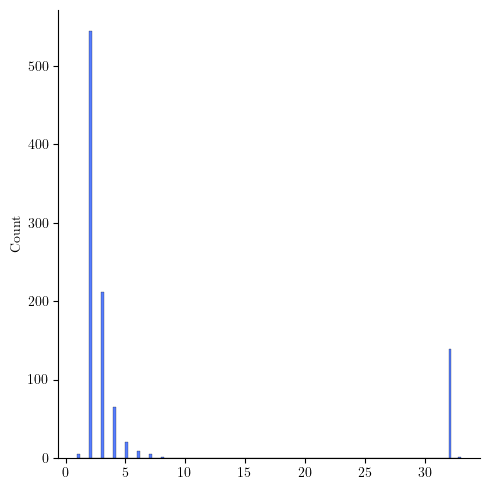

In [35]:
sns.displot(np.array([len(np.unique(b)) for b in samples]))

In [149]:
dkl_prior = -np.mean(data["x-prior"] - data["y-prior"])
dkl_posterior = -np.mean(data["x-posterior"] - data["y-posterior"])

In [151]:
data["x-posterior"]

array([1.65721332, 1.79528111, 1.68740315, 0.03952613, 0.78043897,
       1.78323233, 3.05449852, 1.68374419, 8.96171299, 2.63135491,
       1.73195176, 0.85519548, 1.61734738, 1.42882056, 1.59971038,
       5.85321044, 2.94409517, 0.01476294, 0.13964111, 2.1266857 ,
       1.32083441, 4.69254831, 0.59925596, 0.02915883, 3.57399563,
       2.96894911, 1.41740642, 1.8008139 , 1.52417773, 3.33661368,
       2.00727659, 1.0151378 , 2.68775718, 1.01813326, 1.69696377,
       4.18713993, 2.09739443, 4.59048595, 0.07876851, 4.97341712,
       3.58548611, 1.31558253, 0.02051141, 4.52048595, 4.53795195,
       1.02989396, 1.04174027, 7.45287524, 1.7669953 , 1.01942017,
       2.25713769, 2.37351292, 3.68531265, 2.42770845, 0.75709846,
       1.2746544 , 2.34800378, 1.15217036, 1.44812785, 3.89430279,
       2.74928557, 1.19758356, 1.46978467, 7.81730223, 2.09389547,
       2.32311175, 0.98494284, 3.35536153, 2.29044696, 3.73692489,
       3.30993885, 3.49550947, 1.19792481, 1.10573794, 1.65313

In [152]:
data["y-posterior"]

array([3.11337768, 2.79992833, 1.82852611, 0.05205738, 1.82532915,
       3.80720053, 2.87385898, 4.28089399, 8.05538938, 3.7808779 ,
       2.72648435, 0.79255132, 3.62213044, 2.41114961, 3.16103614,
       4.14824956, 2.8484403 , 0.01714611, 0.1261228 , 2.79518226,
       2.08339457, 2.97255481, 0.67583896, 0.03222689, 1.88097395,
       3.68346313, 3.62036027, 2.75690605, 2.57807356, 3.57063799,
       3.09521349, 1.63233091, 4.24071721, 2.01015487, 2.00867684,
       5.3849249 , 3.68272103, 5.6197153 , 0.02483413, 6.98995647,
       1.88555985, 1.84620193, 0.02803004, 3.6104149 , 5.27597477,
       1.34835073, 2.74474847, 7.02026845, 1.96930121, 1.69511354,
       1.6350423 , 4.35662196, 4.88540642, 1.90585486, 1.68129803,
       2.898961  , 1.66168529, 1.81642982, 1.62585475, 4.87894434,
       2.80483017, 2.79272082, 1.65037115, 5.68518186, 1.62301233,
       4.20877686, 1.88153417, 4.02376423, 1.85775668, 3.23773832,
       3.16115069, 4.10776256, 2.23371075, 1.86088079, 3.15487

In [206]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

x = np.random.randn(10000)
y = 2 * x + np.random.randn() * 0.1



In [215]:
px = KernelDensity().fit(x.reshape(-1, 1))
py = KernelDensity().fit(y.reshape(-1, 1))
pxy = KernelDensity().fit(np.stack([x, y]).T)

In [216]:

s = pxy.sample(1000)
sx, sy = s[:, 0].reshape(-1, 1), s[:, 1].reshape(-1, 1)
dkl1 = np.mean(px.score_samples(sx) - py.score_samples(sx))
dkl2 = np.mean((pxy.score_samples(s) - px.score_samples(sx)) - (pxy.score_samples(s) - py.score_samples(sy)))
print(dkl1, dkl2)

0.17001876910221644 -0.4541689235944388


In [217]:
pxy.score_samples(s) - px.score_samples(sx)

array([-3.22135474, -1.54414563, -1.65142123, -1.56382485, -2.97657854,
       -2.99107293, -1.69795861, -3.18998681, -1.84165864, -2.16500059,
       -1.73825857, -2.19826708, -1.63646455, -1.82831915, -1.78979856,
       -1.55633793, -2.41093628, -1.47312399, -1.67913485, -1.45767558,
       -2.11830536, -2.25108184, -1.86791443, -2.09529822, -2.25384017,
       -1.63854477, -2.00490357, -1.47787272, -1.64616585, -1.43852012,
       -4.25110952, -1.47635042, -1.4775563 , -2.78166214, -1.633951  ,
       -1.7918413 , -1.59375699, -2.16019345, -1.49646992, -3.19616074,
       -3.03378706, -1.48661968, -1.52869212, -1.79026765, -2.52571725,
       -2.43866286, -1.56563205, -1.69810951, -1.57137499, -2.07206673,
       -1.63259756, -1.46432392, -1.51107495, -1.52548284, -1.9494715 ,
       -2.79366056, -2.63212085, -1.47918736, -2.04260646, -1.48297109,
       -1.49091911, -1.67741291, -1.47701006, -1.68263689, -1.46496094,
       -1.54940326, -1.84847209, -1.6794539 , -1.60822735, -1.84

In [218]:
pxy.score_samples(s) - py.score_samples(sy)

array([-1.97585816, -1.27236653, -1.17208001, -1.01003301, -2.67047546,
       -1.88808741, -1.01453003, -1.44904171, -1.6079972 , -2.78078686,
       -1.43343016, -1.39700582, -1.34307119, -1.93780255, -1.00928341,
       -1.33721492, -2.91487901, -1.49237513, -1.01424513, -1.88074978,
       -1.246474  , -1.2931087 , -1.05800449, -1.33459464, -1.34022309,
       -1.01405733, -1.46774887, -1.08528462, -1.0415095 , -2.6490383 ,
       -3.26942639, -1.19575989, -1.26633014, -1.71259495, -1.06912526,
       -1.01325017, -1.23190043, -1.35163781, -1.1446662 , -1.48127219,
       -1.01727797, -1.24276206, -1.26759695, -1.02202084, -2.30961802,
       -1.62442875, -1.33243173, -1.40896149, -1.00998732, -1.07105883,
       -1.09032523, -1.24744137, -1.1291491 , -1.01558173, -1.01293084,
       -1.30252907, -1.030706  , -1.23688111, -1.01980621, -1.01600835,
       -1.03686103, -3.41147831, -1.03336112, -1.02236348, -2.09068786,
       -1.01381371, -2.47401988, -1.02526384, -1.07476263, -1.20

array([[1.91195409, 3.92360413]])

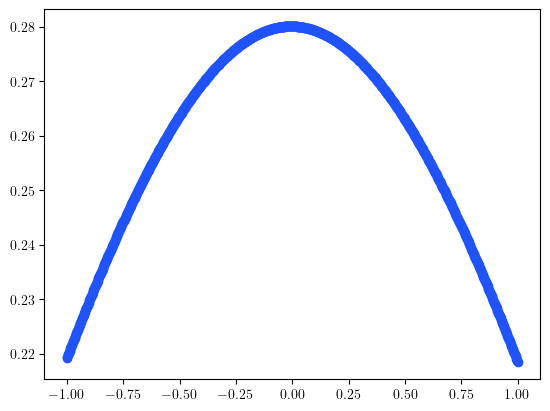

In [179]:
z = np.linspace(-1, 1, 1000).reshape(-1, 1)

plt.plot(z, np.exp(kde.score_samples(z)))


(2000, 183)


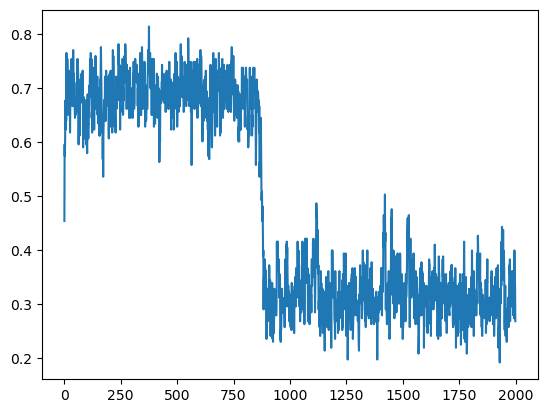

In [47]:
x = np.array(X.get_past_states()).T
print(x.shape)
plt.plot(x.mean(-1))a

In [21]:
import graphinf, midynet, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, tqdm.notebook as tqdm, os
import graph_tool.all as gt

from midynet.utility import display
from functools import partial
from collections import defaultdict
from itertools import product

g0 = midynet.config.GraphConfig.karate()

# g1 = gt.collection.ns[g0.gt_id]
g0 = midynet.config.GraphFactory.build(g0)

In [23]:
g0.get_total_edge_number()

57

In [27]:
G0 = graphinf.graph.DeltaGraph(g0)
X0 = graphinf.data.dynamics.GlauberDynamics(G0, coupling=1, length=500)


G1 = graphinf.graph.ErdosRenyiModel(g0.get_size(), g0.get_total_edge_number(), loopy=True, multigraph=True)
X1 = graphinf.data.dynamics.GlauberDynamics(G1, coupling=1, length=500)

G2 = graphinf.graph.ConfigurationModelFamily(g0.get_size(), g0.get_total_edge_number())
X2 = graphinf.data.dynamics.GlauberDynamics(G2, coupling=1, length=500)

G3 = graphinf.graph.StochasticBlockModelFamily(g0.get_size(), g0.get_total_edge_number(), likelihood_type="uniform", block_proposer_type="multiflip")
X3 = graphinf.data.dynamics.GlauberDynamics(G3, coupling=1, length=500)

In [28]:
# data = defaultdict(list)


pbar = tqdm.tqdm(total=100)
for _ in range(100):
    X0.sample_state()
    X1.from_model(X0)
    X2.from_model(X0)
    X3.from_model(X0)

    hg = X1.log_prior()
    hgx = X1.log_posterior(method="meanfield", n_sweeps=200)
    data["er"].append(1 - hgx / hg)
    
    hg = X2.log_prior()
    hgx = X2.log_posterior(method="meanfield", n_sweeps=200)
    data["cm"].append(1 - hgx / hg)
    
    hg = X3.graph_prior.log_evidence(n_sweeps=1000)
    hgx = X3.log_posterior(method="meanfield", n_sweeps=200)
    data["sbm"].append(1 - hgx / hg)
    pbar.update()
    pbar.set_description(f'er={data["er"][-1]:.2f}, cm={data["cm"][-1]:.2f}, sbm={data["sbm"][-1]:.2f}')

  0%|          | 0/100 [00:00<?, ?it/s]

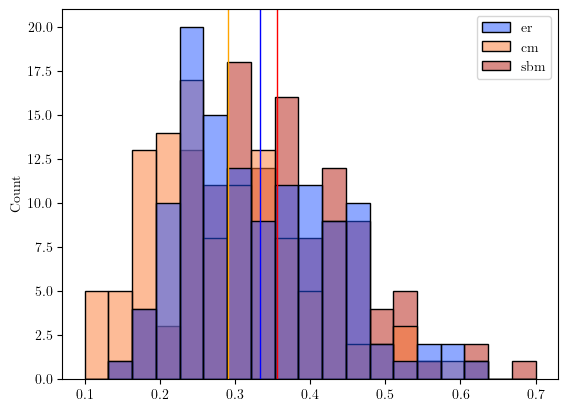

In [37]:
df = pd.DataFrame(data)

sns.histplot(df,bins=np.linspace(0.1, 0.7, 20))
plt.axvline(df.er.mean(), color="blue")
plt.axvline(df.cm.mean(), color="orange")
plt.axvline(df.sbm.mean(), color="red")

In [184]:
g0 = midynet.config.GraphConfig.celegans()
g0 = midynet.config.GraphFactory.build(g0)

G1 = graphinf.graph.ErdosRenyiModel(g0.get_size(), g0.get_total_edge_number())
J = np.linspace(0, 0.1, 20)
avg = []
for j in J:
    X1 = graphinf.data.dynamics.GlauberDynamics(G1, coupling=j, length=1000)
    G1.set_state(g0)
    X1.sample_state()
    avg.append(np.mean(X1.get_past_states()))
avg = np.array(avg)

In [187]:
g0.get_size(), g0.get_total_edge_number()

(514, 3977)

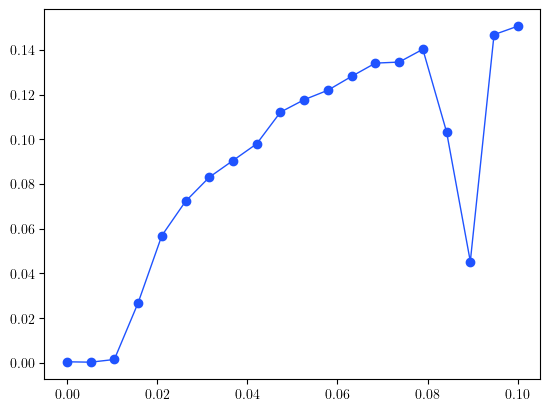

In [185]:
plt.plot(J, np.abs(avg-0.5))

In [186]:
g0

graphinf.utility.save_graph(g0, "../../data/graphs/celegans.npy")


In [155]:
for i in range(1000):
    if i%50 == 0:
        print(G1.metropolis_sweep(), G2.metropolis_sweep())

(-1649.7974551632742, 1555, 224) (-36.557657423824224, 1541, 206)
(-701.8435763464357, 1309, 359) (-45.01325569342927, 2409, 915)
(-319.82557940361477, 1274, 311) (-9.692290071061564, 1932, 733)
(-137.59316561130956, 1717, 191) (-12.134495106725566, 2673, 642)
(-146.0646158081965, 1764, 344) (-22.95230231662225, 2368, 762)
(-72.6603301122253, 1659, 129) (-17.894221533930505, 2248, 1012)
(-70.75263598045457, 2453, 1336) (-65.62547369406263, 2693, 1025)
(-40.480937229207655, 2328, 317) (-0.6647497520348793, 2159, 658)
(-20.617741366545232, 1979, 581) (-6.534989375279679, 1634, 515)
(-31.413210802975968, 2197, 999) (-2.946429030990373, 1767, 619)
(-74.20212517322992, 2658, 1080) (-2.2522076411532055, 2042, 1171)
(-22.09484000139426, 2682, 1068) (-42.924623773030206, 1967, 808)
(-5.481069359977525, 2243, 653) (-12.957114285606224, 1734, 348)
(-20.0449983372673, 2533, 1042) (3.160177381436853, 2133, 793)
(-10.136928834290075, 1723, 255) (5.668026983319919, 2487, 608)
(-3.851171610328805, 27

In [160]:
c = defaultdict(int)
for e in g0.edges():
    c[e] += 1

In [141]:
import time
from datetime import timedelta

t0 = time.time()
G.log_evidence(n_sweeps=10, verbose=True)
t1 = time.time()

print("Estimated time: ", timedelta(seconds=100 * (t1 - t0)))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.22it/s]


Estimated time:  0:08:31.360312


In [142]:
t0 = time.time()
X.log_posterior(n_sweeps=10, method="meanfield", verbose=True)
t1 = time.time()

print("Estimated time: ", timedelta(seconds=100 * (t1 - t0)))

Epoch 0: time= 11.3975, accepted=13288, log(likelihood)=-4749274.4592, log(prior)=-97229.3491
Epoch 1: time= 11.4606, accepted=12016, log(likelihood)=-3824805.4648, log(prior)=-97484.7571
Epoch 2: time= 11.1176, accepted=12307, log(likelihood)=-3219489.8590, log(prior)=-97074.1374
Epoch 3: time= 12.0852, accepted=12526, log(likelihood)=-2832326.9762, log(prior)=-96417.6324
Epoch 4: time= 11.2444, accepted=11602, log(likelihood)=-2596619.0056, log(prior)=-95577.2614
Epoch 5: time= 11.1635, accepted=11202, log(likelihood)=-2440166.1776, log(prior)=-94650.5219
Epoch 6: time= 11.3861, accepted=11019, log(likelihood)=-2334475.8868, log(prior)=-93539.3719
Epoch 7: time= 11.2504, accepted=10169, log(likelihood)=-2260172.3191, log(prior)=-92655.3592
Epoch 8: time= 10.8686, accepted=9523, log(likelihood)=-2208323.8864, log(prior)=-91805.3359
Epoch 9: time= 10.8906, accepted=9585, log(likelihood)=-2160744.9571, log(prior)=-91081.0844
Estimated time:  3:16:58.353105


In [17]:
import tqdm.notebook as tqdmÀ
import graphinf, midynet, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, tqdm.notebook as tqdm, os
import graph_tool.all as gt

from midynet.utility import display
from functools import partial
from collections import defaultdict
from itertools import product
from scipy.stats import ttest_ind

g0 = graphinf.utility.load_graph("../../data/graphs/littlerock.pkl")


In [18]:
ER = graphinf.graph.ErdosRenyiModel(
    g0.get_size(), 
    g0.get_total_edge_number(), 
    loopy=True, 
    multigraph=True
)

SBM = graphinf.graph.StochasticBlockModelFamily(
    g0.get_size(), 
    g0.get_total_edge_number(), 
)


In [21]:
SBM.log_evidence(g0, method="partition_meanfield"), ER.log_evidence(g0)

(-4991.528703127017, -7427.946177823993)

In [37]:
SBM

StochasticBlockModelFamily(
	size=183,
	edge_count=2494,
	block_count=None,
	likelihood_type='uniform',
	label_graph_prior_type='uniform',
	degree_prior_type='uniform',
	canonical=False,
	edge_proposer_type='uniform',
	block_proposer_type='multiflip',
	sample_label_count_prob=0.1,
	shift=1,
)

In [38]:
ER

ErdosRenyiModel(
	size=183,
	edge_count=2494,
	canonical=False,
	loopy=True,
	multigraph=True,
	edge_proposer_type='uniform',
)

In [32]:
data = defaultdict(list)
for _ in tqdm.tqdm(range(200)):
    SBM.sample()
    ER.sample()
    data["entropy"].append(ER.log_evidence())
    data["type"].append("ER")
    data["entropy"].append(SBM.log_evidence(method="partition_meanfield", n_sweeps=200))
    data["type"].append("SBM")
    

  0%|          | 0/200 [00:00<?, ?it/s]

In [34]:
df = pd.DataFrame(data)

In [36]:
df.groupby("type").mean()

,entropy
type,
ER,-7427.946178
SBM,-6669.251110


<Axes: xlabel='entropy', ylabel='Density'>

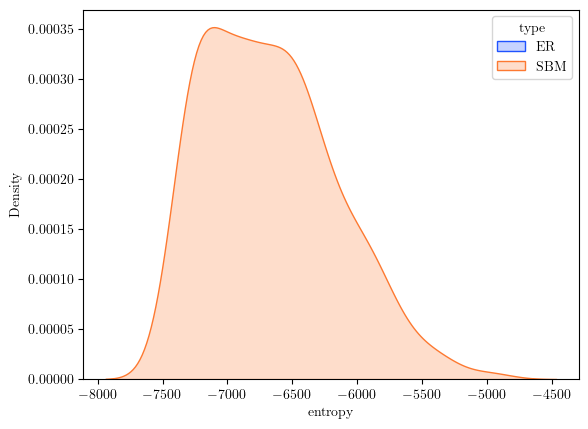

In [48]:
sns.kdeplot(data, x="entropy", hue="type", fill=True)

In [44]:
sns.histplot?

In [9]:
ER = graphinf.graph.ErdosRenyiModel(g0.get_size(), g0.get_total_edge_number(), loopy=True, multigraph=True)
X = graphinf.data.dynamics.GlauberDynamics(ER, coupling=0.027, length=2000)

for _ in range(1):
    erdos = graphinf.utility.EdgeCollector()
    erdos.update(g0)
    X.set_graph(g0.get_deep_copy())
    X.sample_state()
    print("Likelihood", X.log_likelihood())
    X.sample_prior()
    pbar = tqdm.tqdm(total=100)
    s=0
    for i in range(1000):
        erdos.update(X.graph_copy())
        s += X.gibbs_sweep(n_sweeps=5)
        if i % 10 == 0:
            pbar.set_description(f"Success: {s}, L={X.log_likelihood():.4f}")
            pbar.update()
            s=0
    pbar.close()
    print(erdos.log_prob_estimate(g0))

X.set_graph(g0)
print(ER.log_evidence(graph=g0), erdos.log_prob_estimate(g0))

Likelihood -231718.0343922604


  0%|          | 0/100 [00:00<?, ?it/s]

-4395.816854460896
-7427.946177823993 -4395.816854460896


In [13]:
1 - 4395.816854460896/7427.946177823993

0.4082056130691236

In [10]:
SBM = graphinf.graph.StochasticBlockModelFamily(g0.get_size(), g0.get_total_edge_number())
Y = graphinf.data.dynamics.GlauberDynamics(SBM, coupling=0.027, length=2000)

for _ in range(1):
    sbm = graphinf.utility.EdgeCollector()
    sbm.update(g0.get_deep_copy())
    Y.set_state_from(X.wrap)
    Y.sample_prior()
    print(Y.log_likelihood())


    pbar = tqdm.tqdm(total=100)
    for i in range(1000):
        s = Y.gibbs_sweep(n_sweeps=4, sample_prior=True)
        sbm.update(Y.graph_copy())
        if i % 10 == 0:
            pbar.set_description(f"Success: {s}, L={Y.log_likelihood()}")
            pbar.update()
    pbar.close()
    Y.set_graph(g0.get_deep_copy())
print(SBM.log_evidence(g0, method="partition_meanfield"), sbm.log_prob_estimate(g0))

-246455.25565941562


  0%|          | 0/100 [00:00<?, ?it/s]

-4988.015034630063 -3596.1775779816335


In [12]:
1 - 3596.1775779816335 / 4988.015034630063 

0.2790363395028651

In [14]:
from itertools import combinations_with_replacement

def posterior_similarity(collector, g):
    num, den = 0, 0
    for e in combinations_with_replacement(range(g.get_size()), 2):
        m = g.get_edge_multiplicity(*e)
        pi = 1 - collector.mle(e, 0)
        if m > 0:
            num += 1 - pi
            den += 1 + pi
        else:
            num += pi
            den += pi
            
    return 1 - num/den

def posterior_probability(collector, g):
    logp = 0
    for e in combinations_with_replacement(range(g.get_size()), 2):
        m = g.get_edge_multiplicity(*e)
        logp += np.log(collector.mle(e, m) + 1e-8)
    return logp

def entropy(collector, g):
    ent = 0
    for e in combinations_with_replacement(range(g.get_size()), 2):
        pi = 1 - collector.mle(e, 0)
        ent -= pi * np.log(pi)
    return ent

In [16]:
print("post. sim.", posterior_similarity(erdos, g0), posterior_similarity(sbm, g0))
print("log-prob", erdos.log_prob_estimate(g0), sbm.log_prob_estimate(g0))
print("entropy", erdos.entropy(), sbm.entropy())
print("binary entropy", entropy(erdos, g0), entropy(sbm, g0))


post. sim. 0.3892358391531826 0.327242893399762
log-prob -4395.816854460896 -3596.1775779816335
entropy 4585.248469364358 3811.643338247184
binary entropy 2417.0344602253267 1745.0509885542378


In [104]:
ER.set_state(g0)
SBM.set_state(g0)

print(ER.log_evidence(), SBM.log_evidence(method="partition_meanfield"))

-9.361171261678763 -9.717999586434189


In [57]:
1 - 337.446370683327/7427.946177823993, 1 - 800.5786254359017/4989.701464680282

(0.9545707033135529, 0.8395538027469547)

In [321]:
import graph_tool.all as gt

gtg0 = graphinf.utility.convert_basegraph_to_graphtool(g0)

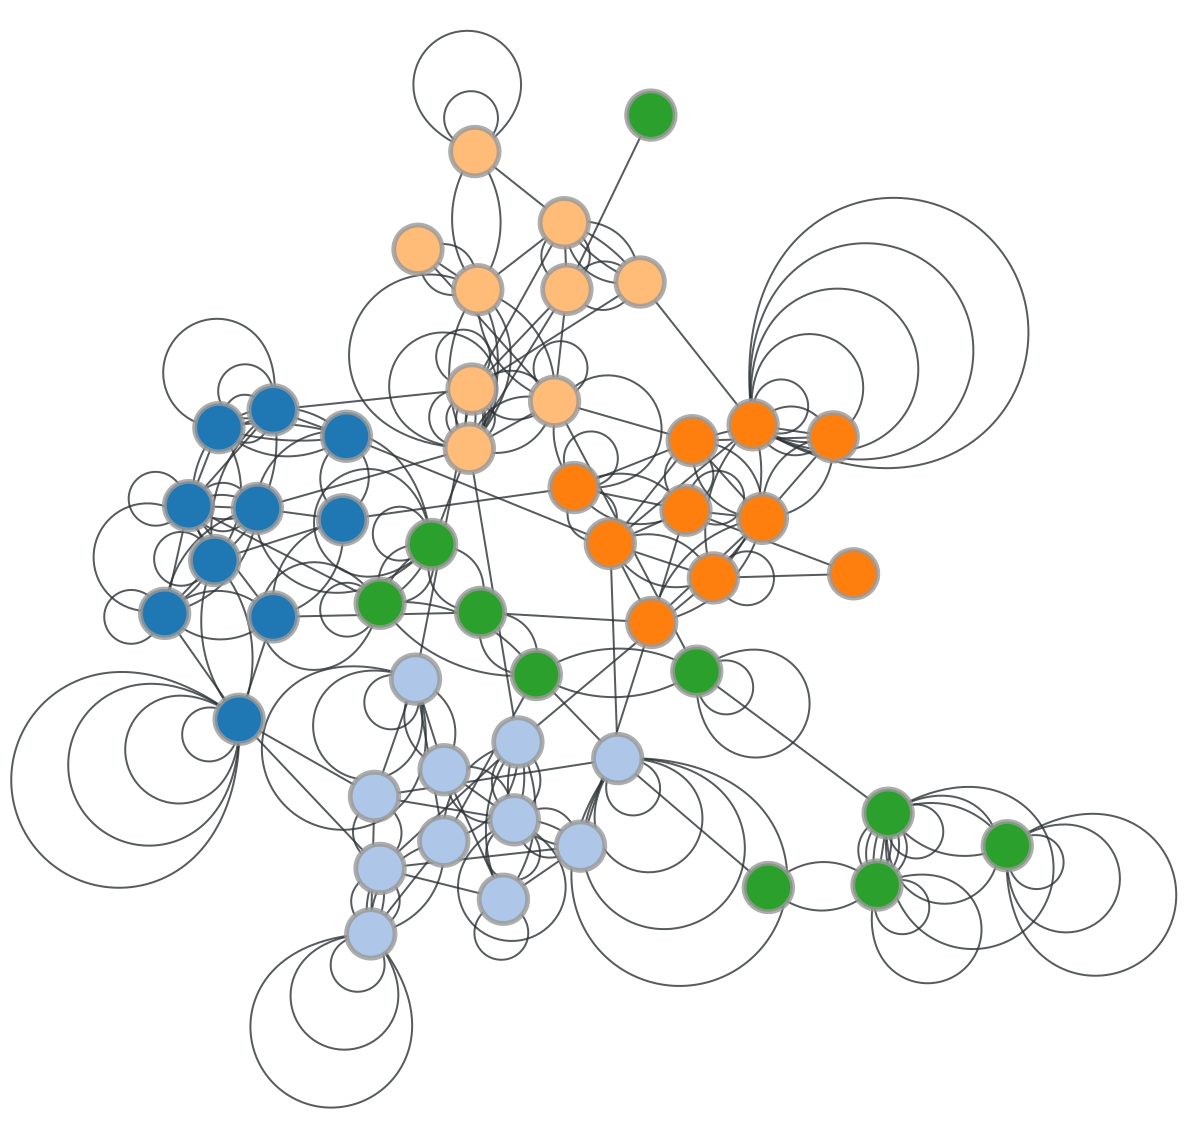

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b5cc8f70, at 0x29e60e440>

In [320]:
mult = {}
eprops = gtg0.new_ep("float")
for e in gtg0.edges():
    m = g0.get_edge_multiplicity(*e)
    eprops[e] = 1
    
gtg0.ep["mult"] = eprops
gtg0.vp["block"] = gtg0.new_vp("int", vals=partitions[-1])
pos = gt.sfdp_layout(gtg0)
gt.graph_draw(gtg0, pos=pos, edge_pen_width=gtg0.ep["mult"], vertex_fill_color=gtg0.vp["block"])

In [315]:
def graph_estimator(mle_probs, size, key="prob"):
    g = gt.Graph(directed=False)
    g.add_vertex(size)
    probs = dict()
    for e in combinations_with_replacement(range(size), 2):
        g.add_edge(*e)
        probs[e] = (1 - mle_probs.mle(e, 0)) ** 1.
    g.ep[key] = g.new_ep("float", vals=probs.values())
    return g

In [144]:
import numpy as np, graphinf, midynet, matplotlib.pyplot as plt, pandas as pd, seaborn as sns, tqdm.notebook as tqdm

from collections import defaultdict

In [146]:
N, M, T = 4, 4, 20

G0 = graphinf.graph.ConfigurationModelFamily(N, M)
X0 = graphinf.data.dynamics.GlauberDynamics(G0, coupling=1., length=T)

G1 = graphinf.graph.ErdosRenyiModel(N, M)
X1 = graphinf.data.dynamics.GlauberDynamics(G1, coupling=1., length=T)

# data = defaultdict(list)
for _ in tqdm.tqdm(range(100)):
    X0.sample()
    X1.from_model(X0)
    
    ec0 = graphinf.utility.EdgeCollector(graphs=[X0.graph()], epsilon=1e-5)
    ec1 = graphinf.utility.EdgeCollector(graphs=[X1.graph()], epsilon=1e-5) 
    
    X0.sample_prior()
    X1.sample_prior()
    
    all_graphs = list(graphinf.utility.enumerate_all_graphs(G0.size(), G0.edge_count(), True, True))
    posterior0_distribution = []
    posterior1_distribution = []
    z0 = X0.log_evidence(method="exact")
    z1 = X1.log_evidence(method="exact")
    for g in all_graphs:
        X0.set_graph(g)
        posterior0_distribution.append(X0.log_joint() - z0)
        
        X1.set_graph(g)
        posterior1_distribution.append(X1.log_joint() - z1)
    posterior0_distribution = np.array(posterior0_distribution)
    posterior1_distribution = np.array(posterior1_distribution)
    for i in range(100):
#         g0 = ec0.sample(edge_count=5)
        g0 = np.random.choice(np.arange(len(all_graphs)), p=np.exp(posterior0_distribution))
        g0 = all_graphs[g0]
        data["prior"].append(-X0.prior.log_evidence(graph=g0, method="exact"))
        data["posterior"].append(-X0.log_posterior(graph=g0, method="exact"))
        data["gain"].append(data["prior"][-1] - data["posterior"][-1])
        data["model"].append("cm")
        
        g1 = np.random.choice(np.arange(len(all_graphs)), p=np.exp(posterior1_distribution))
        g1 = all_graphs[g1]
        data["prior"].append(-X1.prior.log_evidence(graph=g1, method="exact"))
        data["posterior"].append(-X1.log_posterior(graph=g1, method="exact"))
        data["gain"].append(data["prior"][-1] - data["posterior"][-1])
        data["model"].append("er")
#     break

  0%|          | 0/100 [00:00<?, ?it/s]

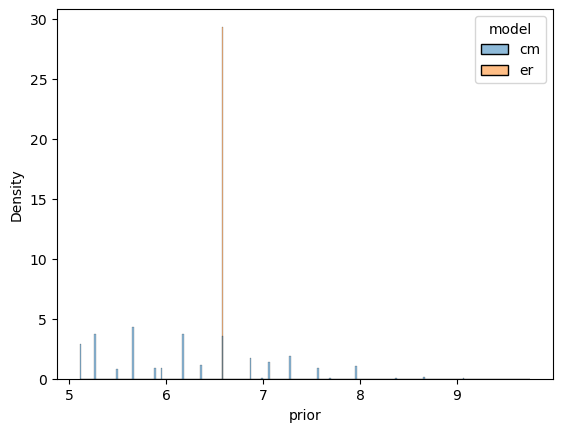

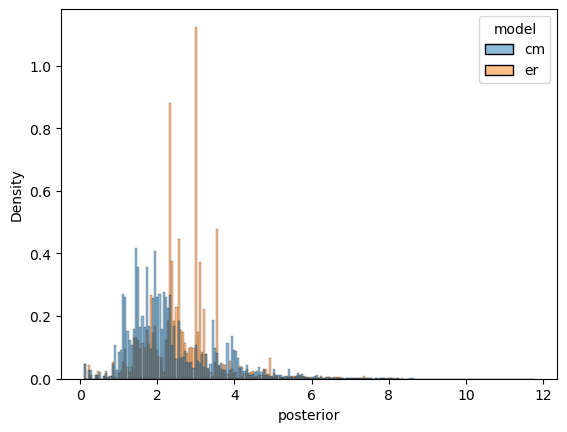

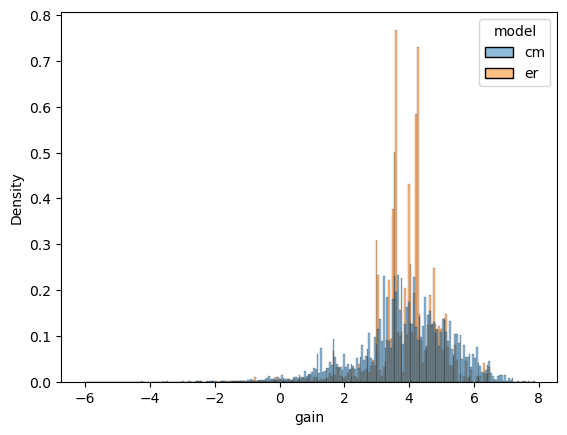

,prior,posterior,gain
model,,,
cm,6.186738,2.329964,3.856774
er,6.572283,2.667594,3.904689


In [140]:
df = pd.DataFrame(data)

sns.histplot(df, x="prior", hue="model", stat="density")
plt.show()
sns.histplot(df, x="posterior", hue="model", stat="density")
plt.show()
sns.histplot(df, x="gain", hue="model", stat="density")
plt.show()
avg = df.groupby("model").mean()
avg

,prior,posterior,gain
model,,,
cm,6.329856,3.131327,3.198529
er,6.572283,3.424367,3.147915


In [ ]:
G0 = graphinf.graph.ErdosRenyiModel(3, 3)
X0 = graphinf.data.dynamics.GlauberDynamics(G0, coupling=0.1, length=100)

G1 = graphinf.graph.ConfigurationModelFamily(3, 3)
X1 = graphinf.data.dynamics.GlauberDynamics(G1, coupling=0.1, length=100)

g0 = midynet.config.GraphFactory.from_name("karate")

data = defaultdict(list)
for _ in tqdm.tqdm(range(100)):
    X0.set_graph(g0)
    X0.sample()
    X1.from_model(X0)
    
    ec0 = graphinf.utility.EdgeCollector(graphs=[X0.graph()], epsilon=1e-5)
    ec1 = graphinf.utility.EdgeCollector(graphs=[X1.graph()], epsilon=1e-5) 
    
    X0.sample_prior()
    X1.sample_prior()
    
    
    for _ in range(1000):
        X0.gibbs_sweep()
        X1.gibbs_sweep()
        ec0.update(X0.graph())
        ec1.update(X1.graph())
#     data = defaultdict(list)
    
#     all_graphs = list(graphinf.utility.enumerate_all_graphs(G0.size(), G0.edge_count(), True, True))
#     posterior0_distribution = []
#     posterior1_distribution = []
#     for g in all_graphs:
#         posterior0_distribution.append(X0.log_posterior(graph=g, method="exact"))
#         posterior1_distribution.append(X1.log_posterior(graph=g, method="exact"))
#     posterior0_distribution = np.array(posterior0_distribution)
#     posterior1_distribution = np.array(posterior1_distribution)
    for i in range(100):
#         g0 = ec0.sample(edge_count=5)
        g0 = np.random.choice(np.arange(len(all_graphs)), p=np.exp(posterior0_distribution))
        g0 = all_graphs[g0]
        data["prior"].append(-X0.prior.log_evidence(graph=g0, method="exact"))
        data["posterior"].append(-X0.log_posterior(graph=g0, method="exact"))
        data["gain"].append(data["prior"][-1] - data["posterior"][-1])
        data["model"].append("er")
        
        g1 = np.random.choice(np.arange(len(all_graphs)), p=np.exp(posterior1_distribution))
        g1 = all_graphs[g1]
        data["prior"].append(-X1.prior.log_evidence(graph=g1, method="exact"))
        data["posterior"].append(-X1.log_posterior(graph=g1, method="exact"))
        data["gain"].append(data["prior"][-1] - data["posterior"][-1])
        data["model"].append("cm")
#     break

In [143]:
np

<module 'numpy' from '/Users/charlesmurphy/miniconda3/envs/midynet-env/lib/python3.10/site-packages/numpy/__init__.py'>